In [64]:
import pandas as pd
import os,shutil,math,scipy,cv2
# cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn


from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc

from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw

from time import time
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG

from scipy import misc,ndimage
from scipy.ndimage.interpolation import zoom
# from scipy.ndimage import imread


from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.preprocessing.image import save_img
from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

import pydot
from tensorflow.keras.losses import CategoricalCrossentropy

In [65]:
# PATH TO FOOD IMAGES
beans = '../food_images/images/BEANS'
cake = '../food_images/images/CAKE'
candy = '../food_images/images/CANDY'
cereal = '../food_images/images/CEREAL'
chips = '../food_images/images/CHIPS'
chocolate = '../food_images/images/CHOCOLATE'
coffee = '../food_images/images/COFFEE'
corn = '../food_images/images/CORN'
fish = '../food_images/images/FISH'
flour = '../food_images/images/FLOUR'
honey = '../food_images/images/HONEY'
jam = '../food_images/images/JAM'
juice = '../food_images/images/JUICE'
milk = '../food_images/images/MILK'
nuts = '../food_images/images/NUTS'
oil = '../food_images/images/OIL'
pasta = '../food_images/images/PASTA'
rice = '../food_images/images/RICE'
soda = '../food_images/images/SODA'
spices = '../food_images/images/SPICES'
sugar = '../food_images/images/SUGAR'
tea = '../food_images/images/TEA'
tomato_sauce = '../food_images/images/TOMATO_SAUCE'
vinegar = '../food_images/images/VINEGAR'
water = '../food_images/images/WATER'

X = []
Z = []
imgsize = 150

In [66]:
def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

In [67]:
training_data('beans',beans)
training_data('cake',cake)
training_data('candy',candy)
training_data('cereal',cereal)
training_data('chips',chips)
training_data('chocolate',chocolate)
training_data('coffee',coffee)
training_data('corn',corn)
training_data('fish',fish)
training_data('flour',flour)
training_data('honey',honey)
training_data('jam',jam)
training_data('juice',juice)
training_data('milk',milk)
training_data('nuts',nuts)
training_data('oil',oil)
training_data('psata',pasta)
training_data('rice',rice)
training_data('soda',soda)
training_data('spices',spices)
training_data('sugar',sugar)
training_data('tea',tea)
training_data('tomato sauce',tomato_sauce)
training_data('vinegar',vinegar)
training_data('water',water)

100%|██████████| 262/262 [00:00<00:00, 392.93it/s]


In [68]:
X[0].shape

(150, 150, 3)

In [69]:
K.image_data_format()

'channels_last'

In [70]:
len(X),len(Z)

(4947, 4947)

In [71]:
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)

In [72]:
Y

array([ 0,  0,  0, ..., 24, 24, 24], dtype=int64)

In [73]:
Y = to_categorical(Y,25)

In [74]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [75]:
X = np.array(X)
X = X.astype('float32')
X=X/255

In [76]:
X.shape,Y.shape

((4947, 150, 150, 3), (4947, 25))

In [77]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [78]:
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

augs_gen.fit(x_train)

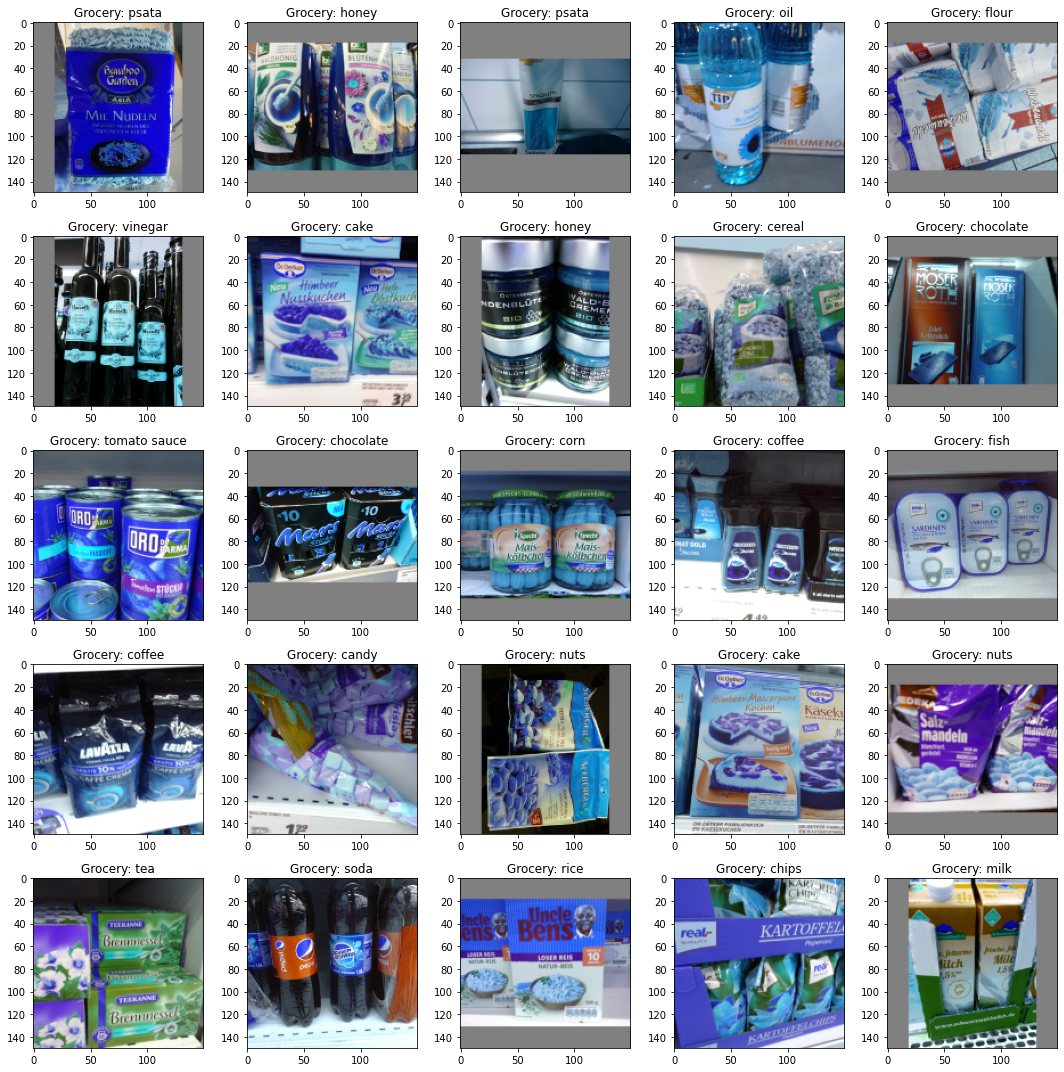

In [79]:
fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Grocery: '+Z[l])
        
plt.tight_layout()

In [80]:
img_rows = 150
img_cols = 150

In [81]:
input_shape = (img_rows, img_cols, 3)
number_of_classes = 25

In [82]:
model = Sequential([
    Input(shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(number_of_classes, activation='softmax')
])

In [83]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 180000)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               23040128  
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 25)               

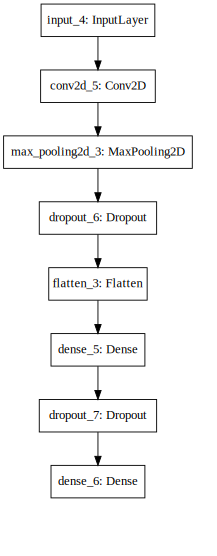

In [84]:

display(SVG(model_to_dot(model, dpi=65).create(prog='dot', format='svg')))

In [85]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [86]:

batch_size = 128
epochs = 12

In [87]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/12
22/22 [==============================] - 24s 1s/step - loss: 8.7154 - accuracy: 0.0441 - val_loss: 3.2127 - val_accuracy: 0.0779
Epoch 2/12
22/22 [==============================] - 25s 1s/step - loss: 3.2040 - accuracy: 0.0813 - val_loss: 3.2068 - val_accuracy: 0.0837
Epoch 3/12
22/22 [==============================] - 23s 1s/step - loss: 3.1989 - accuracy: 0.0719 - val_loss: 3.2021 - val_accuracy: 0.0837
Epoch 4/12
22/22 [==============================] - 24s 1s/step - loss: 3.2007 - accuracy: 0.0773 - val_loss: 3.1958 - val_accuracy: 0.0837
Epoch 5/12
22/22 [==============================] - 23s 1s/step - loss: 3.1866 - accuracy: 0.0795 - val_loss: 3.1915 - val_accuracy: 0.0808
Epoch 6/12
22/22 [==============================] - 24s 1s/step - loss: 3.1743 - accuracy: 0.0813 - val_loss: 3.1908 - val_accuracy: 0.0794
Epoch 7/12
22/22 [==============================] - 24s 1s/step - loss: 3.1702 - accuracy: 0.0798 - val_loss: 3.1825 - val_accuracy: 0.0823
Epoch 8/12
22/22 [==

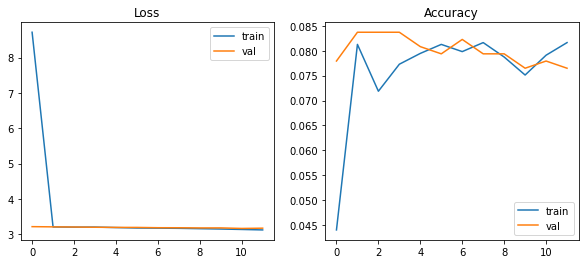

In [88]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(np.arange(0, epochs), history.history['loss'], label='train')
plt.plot(np.arange(0, epochs), history.history['val_loss'], label='val')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(np.arange(0, epochs), history.history['accuracy'], label='train')
plt.plot(np.arange(0, epochs), history.history['val_accuracy'], label='val')
plt.legend(loc='best')

plt.show()